In [2]:
# import all libraries that we used

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#1 Load DataSet
data = pd.read_csv("train.csv")

In [11]:
# Overview of the dataset

data.info()
data.describe(include='all')  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,s
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,24.046813,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,20.481625,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN


In [5]:
#2 Calculate summary statistics for relevant variables

numeric_summary = data.describe()

categorical_summary = data.describe(include=['object'])

numeric_summary, categorical_summary


(       PassengerId    Survived      Pclass         Age       SibSp  \
 count   891.000000  891.000000  891.000000  714.000000  891.000000   
 mean    446.000000    0.383838    2.308642   29.699118    0.523008   
 std     257.353842    0.486592    0.836071   14.526497    1.102743   
 min       1.000000    0.000000    1.000000    0.420000    0.000000   
 25%     223.500000    0.000000    2.000000   20.125000    0.000000   
 50%     446.000000    0.000000    3.000000   28.000000    0.000000   
 75%     668.500000    1.000000    3.000000   38.000000    1.000000   
 max     891.000000    1.000000    3.000000   80.000000    8.000000   
 
             Parch        Fare  
 count  891.000000  891.000000  
 mean     0.381594   32.204208  
 std      0.806057   49.693429  
 min      0.000000    0.000000  
 25%      0.000000    7.910400  
 50%      0.000000   14.454200  
 75%      0.000000   31.000000  
 max      6.000000  512.329200  ,
                            Name   Sex  Ticket Embarked
 coun

In [10]:
# Data Cleaning
data['Age'].fillna(data['Age'].median())
data['Fare'].fillna(data['Fare'].median())

Q1 = data['Fare'].quantile(0.25)
Q3 = data['Fare'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


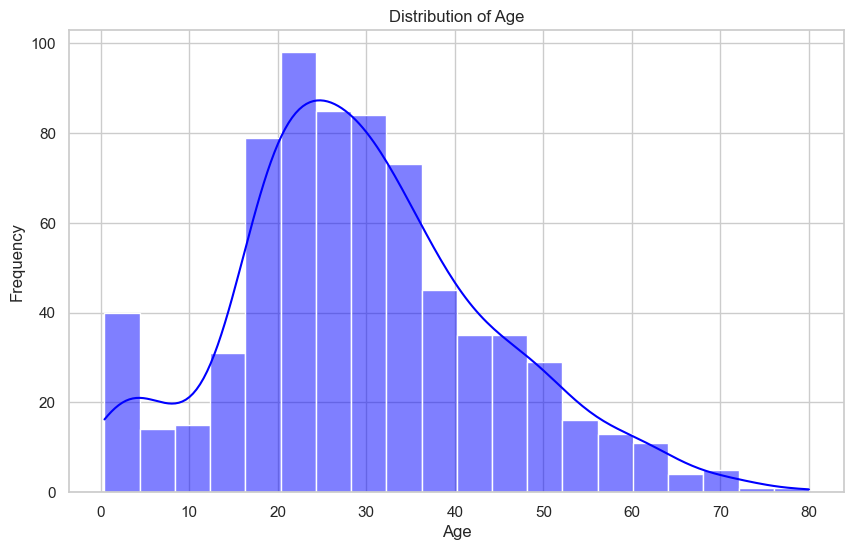

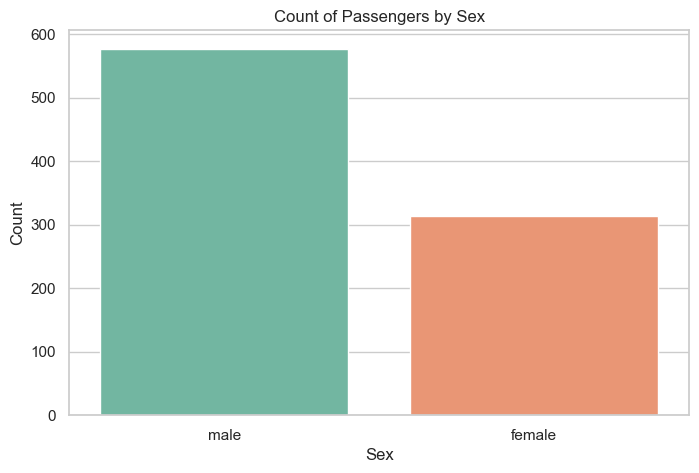

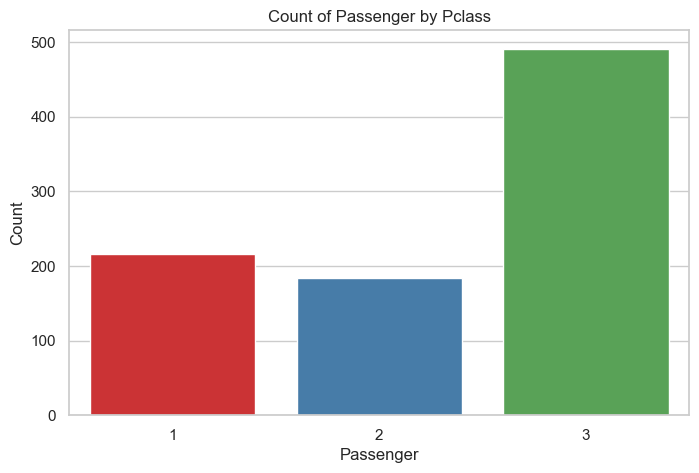

In [10]:
#3 Visualize the distribution of variables using histograms, bar plots

# Using histogram (Age)
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], kde=True, color='blue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Using Bar Plot (Sex)
plt.figure(figsize=(8, 5))
sns.countplot(x='Sex', data=data, palette='Set2')
plt.title('Count of Passengers by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

# Using Bar Plot (Pclass)
plt.figure(figsize=(8, 5))
sns.countplot(x='Pclass', data=data, palette='Set1')
plt.title('Count of Passenger by Pclass')
plt.xlabel('Passenger')
plt.ylabel('Count')
plt.show()


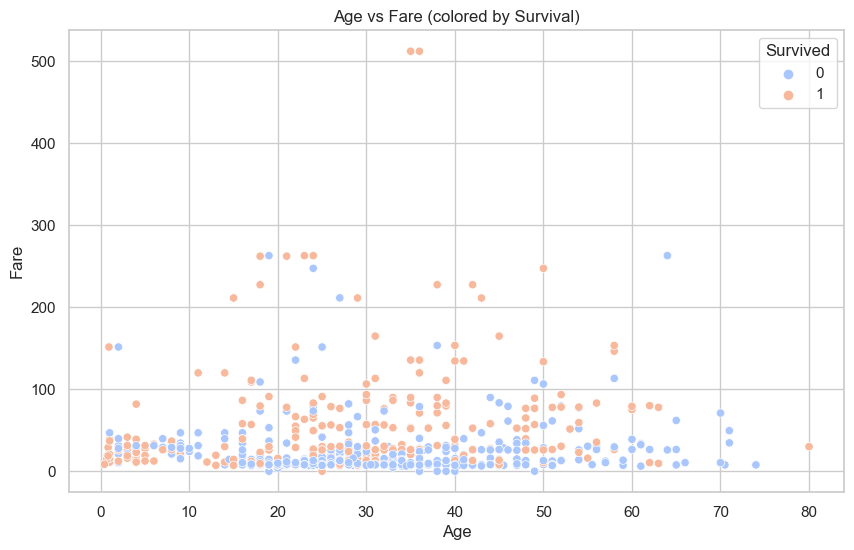

C:\Users\User\AppData\Local\Temp\ipykernel_11156\3883399374.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Pclass', y='Survived', data=data, palette='muted', ci=None)


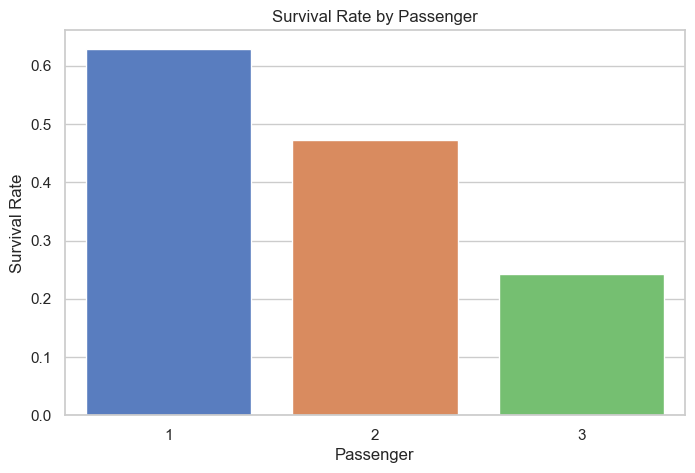

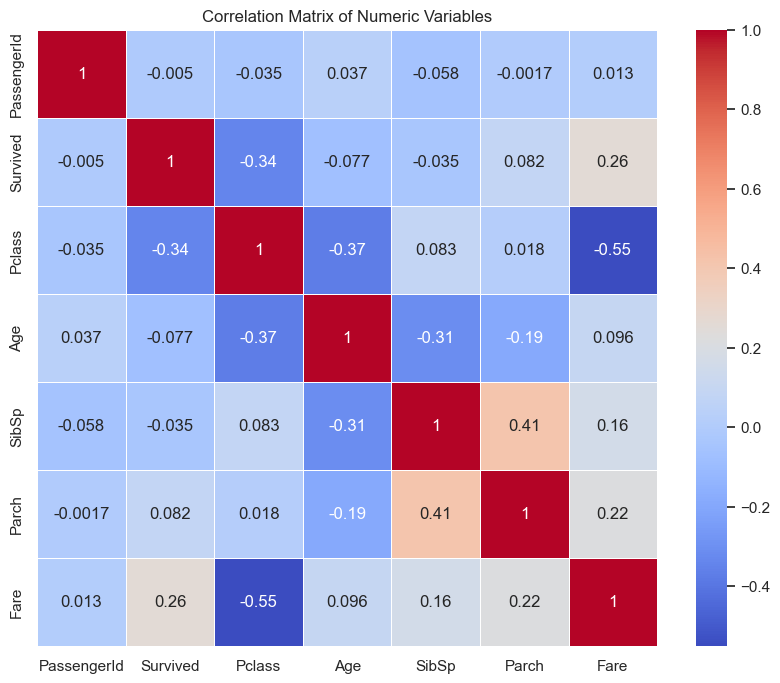

In [15]:
# # Using Scatterplot 'Age' vs 'Fare'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=data, palette='coolwarm')
plt.title('Age vs Fare (colored by Survival)')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

# Bar plot showing survival rate by Pclass
plt.figure(figsize=(8, 5))
sns.barplot(x='Pclass', y='Survived', data=data, palette='muted', ci=None)
plt.title('Survival Rate by Passenger')
plt.xlabel('Passenger')
plt.ylabel('Survival Rate')
plt.show()

# Correlation heatmap for numeric variables
numeric_data = data.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numeric Variables')
plt.show()



In [19]:
#5 Identifying Patterns, Trends, and Anomalies

identify_patterns = """"
1. Age Distribution: Is skewed toward younger passengers. The distribution can show possible anomalies if certain age groups survived more.
2. Gender Count: More male passengers than female, which could affect survival rate.
3. Pclass and Survival: Passengers in higher classes (Pclass 1) seem to have a higher survival rate.
4. Age vs Fare: Younger passengers mostly had lower fares, while older passengers show a wide range of fares.
"""
print(identify_patterns)

"
1. Age Distribution: Is skewed toward younger passengers. The distribution can show possible anomalies if certain age groups survived more.
2. Gender Count: More male passengers than female, which could affect survival rate.
3. Pclass and Survival: Passengers in higher classes (Pclass 1) seem to have a higher survival rate.
4. Age vs Fare: Younger passengers mostly had lower fares, while older passengers show a wide range of fares.



In [40]:
# Summarize Findings and Insights

summary = """
1. The dataset shows a skewed age distribution with a majority of passengers between 20-40 years old.
2. The majority of passengers are male, but the survival rate is higher among females.
3. There is a clear trend where passengers in higher classes (Pclass 1) have better survival rates compared to lower classes.
4. Fare and Age seem weakly correlated. Passengers with higher fares tend to be older.
5. The heatmap suggests that the strongest correlations exist between Pclass and Fare, as well as SibSp and Parch with FamilySize.
"""
print(summary)



1. The dataset shows a skewed age distribution with a majority of passengers between 20-40 years old.
2. The majority of passengers are male, but the survival rate is higher among females.
3. There is a clear trend where passengers in higher classes (Pclass 1) have better survival rates compared to lower classes.
4. Fare and Age seem weakly correlated. Passengers with higher fares tend to be older.
5. The heatmap suggests that the strongest correlations exist between Pclass and Fare, as well as SibSp and Parch with FamilySize.

